<a href="https://colab.research.google.com/github/CodeCraftTejas/OIBSIP/blob/main/Task5_OIBSIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# Step 2: Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


In [4]:
# Step 3: Load the dataset from Google Drive
file_path = "/content/drive/My Drive/Colab Notebooks/Advertising.csv"  # Adjust if needed
df = pd.read_csv(file_path)

# Preview
print("🔍 First 5 rows:")
print(df.head())

# Column types and null check
print("\n🧾 Info:")
print(df.info())

print("\n❓ Missing values:")
print(df.isnull().sum())


🔍 First 5 rows:
   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9

🧾 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None

❓ Missing values:
Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64


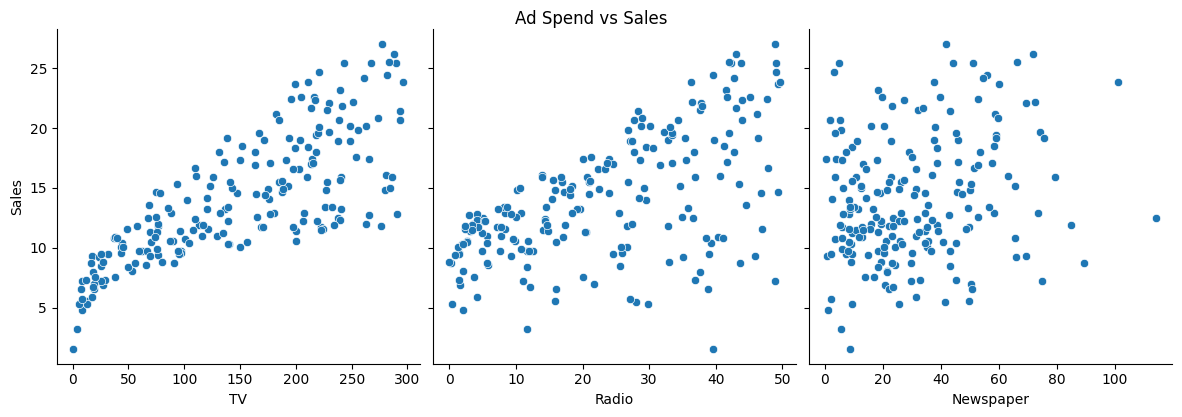

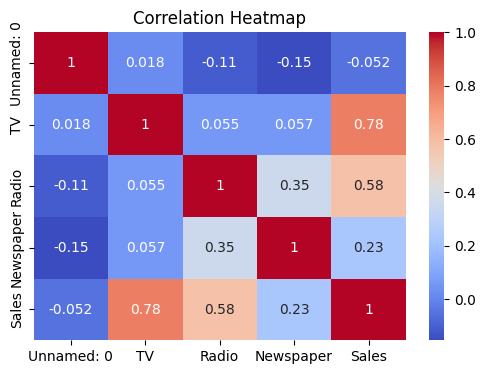

In [5]:
# Step 4: Exploratory Data Analysis (EDA)

# Pairplot to visualize relation between features and sales
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4)
plt.suptitle("Ad Spend vs Sales", y=1.02)
plt.show()

# Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [6]:
# Step 5: Prepare the data for model

# Feature matrix and target vector
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Step 6: Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)


In [8]:
# Step 7: Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"✅ R² Score: {r2:.4f}")
print(f"📉 Mean Squared Error: {mse:.4f}")

# Show actual vs predicted
comparison = pd.DataFrame({'Actual Sales': y_test, 'Predicted Sales': y_pred})
print("\n🆚 Actual vs Predicted Sales:")
print(comparison.head())


✅ R² Score: 0.8994
📉 Mean Squared Error: 3.1741

🆚 Actual vs Predicted Sales:
     Actual Sales  Predicted Sales
95           16.9        16.408024
15           22.4        20.889882
30           21.4        21.553843
158           7.3        10.608503
128          24.7        22.112373


In [11]:
accuracy = r2_score(y_test, y_pred) * 100  # Convert to percentage
print(f"🎯 R² Score (Accuracy for Linear Regression): {accuracy:.2f}%")


🎯 R² Score (Accuracy for Linear Regression): 89.94%


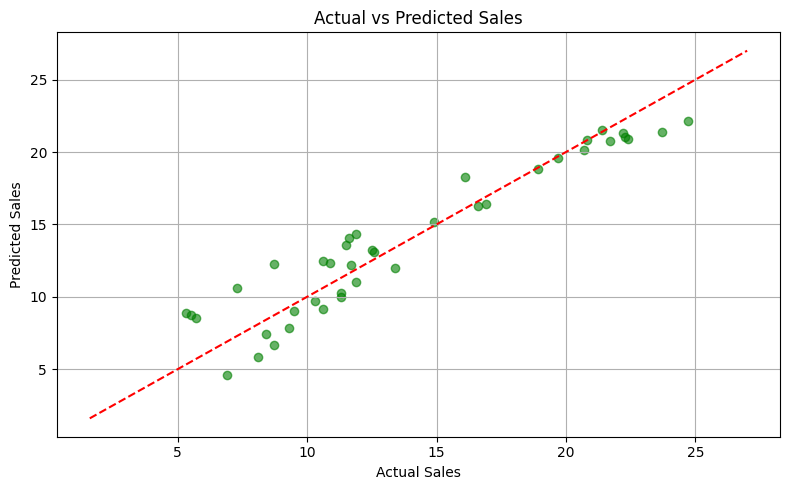

In [9]:
# Step 8: Plot actual vs predicted
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color='green', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.grid(True)
plt.tight_layout()
plt.show()
